## LECE - 2

In [1]:
# 环境变量设置
import os
os.environ["OPENAI_API_KEY"] = "sk-xxx"
os.environ["OPENAI_API_BASE"] = "https://api.chatanywhere.tech/v1"

### 统一接口 Runnable interface

为了尽可能简化创建自定义链的过程，我们实现了一个 "Runnable" 协议。Runnable 协议已为大多数组件实现。 这是一个标准接口，可以轻松定义自定义链并以标准方式调用它们。 标准接口包括：

- stream: 流式返回响应的块

- invoke: 在输入上调用链

- batch: 在输入列表上调用链

这些方法也有对应的异步方法:

- astream: 异步流式返回响应的块

- ainvoke: 异步在输入上调用链

- abatch: 异步在输入列表上调用链

- astream_log: 异步流式返回中间步骤，以及最终响应

- astream_events: beta 异步流式返回链中发生的事件（在 langchain-core 0.1.14 中引入）


输入类型和输出类型因组件而异:

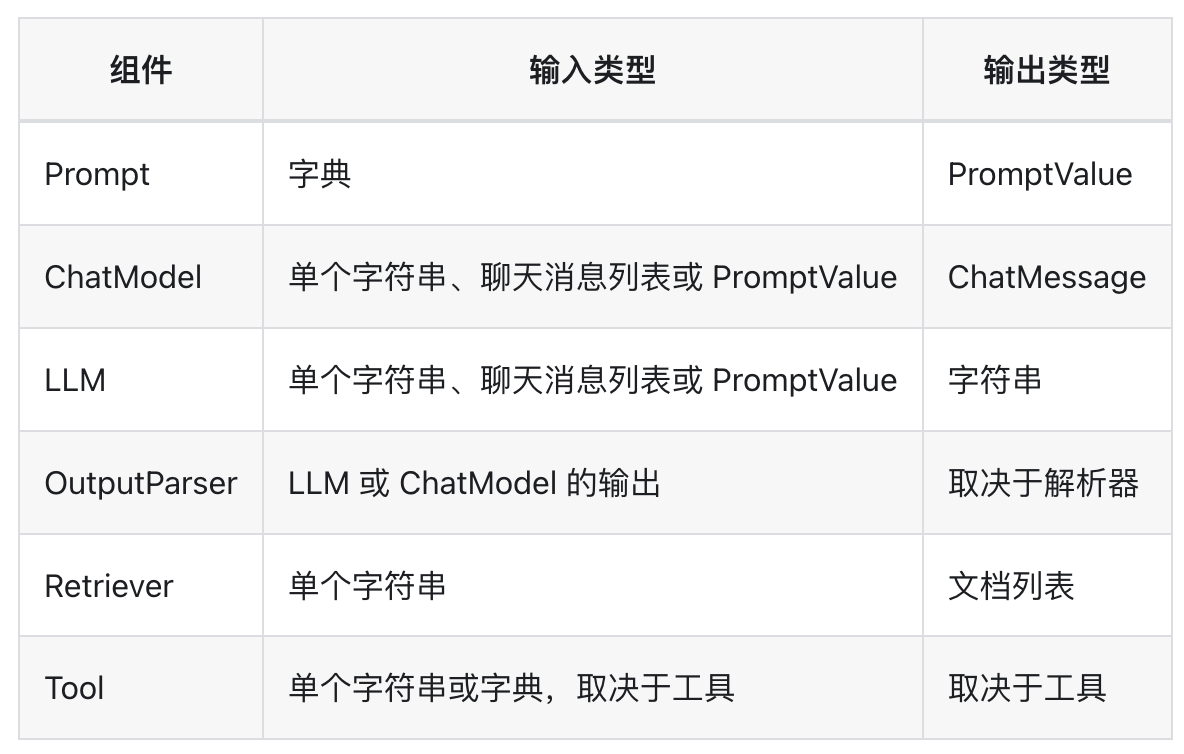

所有可运行对象都公开输入和输出的模式以检查输入和输出

- input_schema: 从 Runnable 的结构动态生成的输入 Pydantic 模型
- output_schema: 从 Runnable 的结构动态生成的输出 Pydantic 模型

In [15]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

model = ChatOpenAI()
prompt = ChatPromptTemplate.from_template("请讲一个关于{topic}的笑话，字数在500左右")
chain = prompt | model

### 输入模式

In [3]:
# 链的输入模式是其第一个部分（prompt）的输入模式。
chain.input_schema.schema()

{'title': 'PromptInput',
 'type': 'object',
 'properties': {'topic': {'title': 'Topic', 'type': 'string'}}}

In [4]:
prompt.input_schema.schema()

{'title': 'PromptInput',
 'type': 'object',
 'properties': {'topic': {'title': 'Topic', 'type': 'string'}}}

In [5]:
model.input_schema.schema()

{'title': 'ChatOpenAIInput',
 'anyOf': [{'type': 'string'},
  {'$ref': '#/definitions/StringPromptValue'},
  {'$ref': '#/definitions/ChatPromptValueConcrete'},
  {'type': 'array',
   'items': {'anyOf': [{'$ref': '#/definitions/AIMessage'},
     {'$ref': '#/definitions/HumanMessage'},
     {'$ref': '#/definitions/ChatMessage'},
     {'$ref': '#/definitions/SystemMessage'},
     {'$ref': '#/definitions/FunctionMessage'},
     {'$ref': '#/definitions/ToolMessage'}]}}],
 'definitions': {'StringPromptValue': {'title': 'StringPromptValue',
   'description': 'String prompt value.',
   'type': 'object',
   'properties': {'text': {'title': 'Text', 'type': 'string'},
    'type': {'title': 'Type',
     'default': 'StringPromptValue',
     'enum': ['StringPromptValue'],
     'type': 'string'}},
   'required': ['text']},
  'ToolCall': {'title': 'ToolCall',
   'type': 'object',
   'properties': {'name': {'title': 'Name', 'type': 'string'},
    'args': {'title': 'Args', 'type': 'object'},
    'id': {

### 输出模式

In [6]:
# 链的输出模式是其最后一部分的输出模式，本例中是 ChatModel，它输出一个 ChatMessage
chain.output_schema.schema()

{'title': 'ChatOpenAIOutput',
 'anyOf': [{'$ref': '#/definitions/AIMessage'},
  {'$ref': '#/definitions/HumanMessage'},
  {'$ref': '#/definitions/ChatMessage'},
  {'$ref': '#/definitions/SystemMessage'},
  {'$ref': '#/definitions/FunctionMessage'},
  {'$ref': '#/definitions/ToolMessage'}],
 'definitions': {'ToolCall': {'title': 'ToolCall',
   'type': 'object',
   'properties': {'name': {'title': 'Name', 'type': 'string'},
    'args': {'title': 'Args', 'type': 'object'},
    'id': {'title': 'Id', 'type': 'string'}},
   'required': ['name', 'args', 'id']},
  'InvalidToolCall': {'title': 'InvalidToolCall',
   'type': 'object',
   'properties': {'name': {'title': 'Name', 'type': 'string'},
    'args': {'title': 'Args', 'type': 'string'},
    'id': {'title': 'Id', 'type': 'string'},
    'error': {'title': 'Error', 'type': 'string'}},
   'required': ['name', 'args', 'id', 'error']},
  'AIMessage': {'title': 'AIMessage',
   'description': 'Message from an AI.',
   'type': 'object',
   'proper

### Stream
流式输出

In [21]:
for s in chain.stream({"topic": "熊"}):
    print(s.content, end="", flush=True)

有一天，森林里的熊们聚在一起开会，讨论如何提高自己的形象和声誉。其中一只熊提议说：“我们可以学习人类，像他们一样懂礼貌，待人友善。”其他熊们纷纷表示赞同，于是他们决定找一位专家来教他们礼仪和待人之道。

于是，他们找到了一位知名的礼仪专家，专家很高兴地答应帮助熊们提升形象。第一堂课，专家告诉熊们：“要学会握手，这是人类之间的一种礼貌行为。”于是，专家示范了一遍握手的动作，熊们也模仿着学习。

第二堂课，专家告诉熊们：“要学会微笑，微笑是展示友好的方式。”于是，专家教会了熊们如何微笑，他们也认真地练习起来。

第三堂课，专家告诉熊们：“要学会说‘请’和‘谢谢’，这是表达尊重和感激的方式。”熊们听了专家的话，纷纷说起了“请”和“谢谢”。

经过了一段时间的学习和练习，熊们终于准备好展示他们所学到的礼仪和待人之道。他们举办了一场盛大的活动，邀请了许多动物朋友和人类观众前来参加。

活动开始了，熊们展示了握手、微笑和说“请”、“谢谢”的技能，观众们都感到惊讶和赞叹。熊们以前的蛮横和粗鲁形象完全被改变，现在他们变得友善和有礼貌。

就在活动即将结束的时候，一只熊突然跳了出来，高声喊道：“我有一个笑话要告诉大家！”其他熊们都惊讶地看着他，这只熊开始讲起笑话：“为什么熊喜欢冬天？因为这时候可以在河边捉鱼啊！哈哈哈！”听到这个笑话，观众们纷纷大笑，熊们也跟着笑了起来。

这场活动不仅让熊们学会了礼仪和待人之道，还让他们学会了用幽默和笑声来传递快乐。从此以后，森林里的熊们变得更加受人喜爱，他们的笑声响彻整个森林，让每个人都感到温馨和快乐。笑声传遍整个森林，成为了熊们新的标志，也让他们在人类和其他动物中建立了更加友好和和谐的关系。笑声是最好的礼物，也是最好的交流方式，让我们一起学会用笑声来传递快乐和友爱吧！

### Invoke

In [16]:
chain.invoke({"topic": "熊"})

AIMessage(content='有一天，森林里的动物们举行了一场盛大的舞会。狐狸、兔子、鹿等各种动物都穿着漂亮的衣服，跳着欢快的舞蹈。就连一向孤僻的熊也被邀请参加了这场盛会。\n\n熊非常高兴地接受了邀请，穿着一身漂亮的西装，跟着音乐摇摆起来。他的舞姿虽然有点笨拙，但是大家都觉得很可爱。熊也觉得自己很开心，终于可以融入这个大家庭了。\n\n突然，一只小松鼠跑过来对熊说：“喂，熊哥，你知道吗？你的舞姿像个笨拙的大熊猫！”熊听了之后有点尴尬，但还是笑着说：“是吗？我可是真正的熊啊，虽然有点笨拙，但我在尽力表现自己。”\n\n小松鼠听了大笑起来：“哈哈哈，我知道你是真正的熊啦，开个玩笑而已嘛！不过，你真的跳舞很有趣，大家都很喜欢你呢！”熊听了之后也笑了起来，觉得自己在这个大家庭中真的被接纳了。\n\n从那以后，熊经常参加森林里的各种活动，大家也都喜欢和他在一起。熊也慢慢变得更加开朗和活泼，成为了大家心目中的开心果。\n\n所以，无论你是什么样的动物，只要你敢于表现真实的自己，就一定能找到属于自己的幸福和快乐。就像熊一样，虽然有时候有点笨拙，但只要坚持努力，就能在大家的心中留下美好的回忆。笑容是最好的解药，让我们一起笑对生活，享受每一刻的快乐！', response_metadata={'token_usage': {'completion_tokens': 644, 'prompt_tokens': 26, 'total_tokens': 670}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-d5f1b1d7-1b1f-49e9-89d2-2100e477fee3-0')

### Batch
批处理，同时处理多个输入, max _ concurrency 参数可以设置并发请求的数量

In [19]:
chain.batch([{"topic": "熊"}, {"topic": "熊猫"}],  config={"max_concurrency": 5})

[AIMessage(content='有一天，森林里的熊们聚在一起开会讨论他们心中最大的困扰：人类的垃圾问题。一只聪明的老熊站起来说：“我有一个主意，我们可以学着人类的方式来解决这个问题。”\n\n其他熊们都很好奇地问：“那你的主意是什么呢？”\n\n老熊微笑着说：“我们可以建立一个‘垃圾分类中心’，把可回收的东西和有害的垃圾分开收集，然后再进行处理。”\n\n其他熊们觉得这个主意很不错，于是他们开始行动起来。他们建立了一个垃圾分类中心，每只熊都负责一种垃圾的分类工作。\n\n在经过一段时间的努力后，森林里的垃圾问题得到了有效的解决。熊们很开心地发现，他们的家园变得更加清洁美丽了。\n\n有一天，一只经过的猎人看到了这个情景，他感到非常惊讶。他走进熊们的垃圾分类中心，对老熊说：“你们这些熊真是太聪明了！你们是怎么想到这个主意的？”\n\n老熊笑着回答：“我们只是学习了人类的做法罢了。毕竟，我们也是想要保护我们的家园的。”\n\n猎人听了非常感动，他决定以后再也不猎杀这些聪明的熊了。于是，从那天起，森林里的熊们和人类和平共处，共同保护着这片美丽的家园。\n\n这个笑话让人感叹熊们的聪明和善良，也让我们意识到保护环境的重要性。希望我们每个人都能像森林里的熊一样，为环境做出自己的努力。', response_metadata={'token_usage': {'completion_tokens': 591, 'prompt_tokens': 26, 'total_tokens': 617}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-f5c628b6-354c-4a70-928f-543868188d27-0'),
 AIMessage(content='有一天，一只熊猫走进了一家餐馆，坐在了吧台前。餐馆老板看到熊猫，心想这可真是个罕见的客人，赶紧上前问道：“先生，您要点什么呢？”\n\n熊猫摇摇头，示意自己什么都不想要。老板见状，笑着说：“您不点菜就算了，来杯茶怎么样？”\n\n熊猫点点头，示意可以。老板连忙泡了一杯茶递给熊猫，然后又问：“来点甜点吗？我们这里的蛋糕很好吃哦。”\n\n熊猫

### Async Stream

In [23]:
async for s in chain.astream({"topic": "熊"}):
    print(s.content, end="", flush=True)

有一只熊走进了一个酒吧，坐在吧台前，点了一杯啤酒。酒保看着熊有些吃惊，但还是倒给了它一杯啤酒。熊把啤酒一饮而尽，然后拿出了一把钱放在吧台上。

酒保看着熊，有些好奇，便问道：“对不起，我还从来没有见过一只熊来喝酒，你是怎么学会来这里的？”

熊笑着说道：“哦，这其实是一个很有趣的故事。有一天，我在森林里遇到了一个巫师，他给了我一个神奇的戒指，说只要我戴上它，就能变成一个人类。我戴上了戒指，然后就来到了这个酒吧。”

酒保听了，有些不信，便问：“那你怎么会变回熊呢？”

熊笑着说：“哦，这也是一个很有趣的故事。你知道吗，当我戴上戒指后，我看到了一个美丽的女士，便决定追求她。我们一起度过了很多美好的时光，但是有一天，女士发现了我的秘密，她把我的戒指偷走了。”

酒保听完，忍不住笑了出来，说：“所以你现在又变回了熊？”

熊点点头，说：“是的，我现在又变回了熊。但是，我不后悔，因为我学会了如何去爱和被爱。”

酒保听完，感动地说：“这真是一个温馨的故事，我希望你能找到你的真爱。”

熊笑着点点头，然后转身离开了酒吧。酒保看着熊的背影，感慨地说：“有些人可能永远无法理解，但爱是没有界限的，就像这只熊一样，它学会了如何去爱和被爱。”

### Async Invoke

In [22]:
await chain.ainvoke({"topic": "熊"})

AIMessage(content='有一只熊走进了一家餐厅，坐在了吧台前。侍者走过来问：“请问您想点些什么？”熊想了一会儿，然后说：“我想要一杯啤酒和……”突然，熊的手机响了，他拿出手机接起电话，原来是他的朋友打来的。熊和他的朋友聊了一会儿，然后挂了电话。侍者问：“那您决定点什么了吗？”熊想了想说：“我想要一杯啤酒和一份三明治。”侍者点了点头，然后走到吧台后面准备熊的点餐。\n\n过了一会儿，侍者端着一杯啤酒和一份三明治走过来，放在了熊面前。熊高兴地拿起啤酒，喝了一口，然后拿起三明治，咬了一口。突然，熊看到了餐厅的墙上挂着一幅画，画的是一只熊捧着一份三明治和一杯啤酒，旁边还有一只熊在打电话。熊一边吃着三明治一边笑了起来，对侍者说：“你看，这幅画真有趣，就像是在讲我的故事一样！”\n\n侍者听了，也跟着笑了起来，说：“是啊，这画确实很有趣。”熊继续享受着美食和啤酒，心情愉快地度过了一顿美味的晚餐。\n\n这只熊虽然外表威猛，但其实内心是善良和幽默的。他在餐厅里展现出了他的幽默感和乐观的态度，让人感受到了他的快乐和幸福。这个故事告诉我们，人生不必太过严肃，适当的幽默和乐观心态可以让我们享受生活的美好，就像这只熊一样，笑着面对生活的种种挑战。笑声是最好的疗愈，让我们一起学会用笑容去迎接生活的每一天吧！', response_metadata={'token_usage': {'completion_tokens': 687, 'prompt_tokens': 26, 'total_tokens': 713}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-1c525afc-77c9-4b08-b7e8-a01c27ff99fe-0')

### Async Batch

In [24]:
await chain.abatch([{"topic": "熊"}])

[AIMessage(content='有一只熊走进了一个餐馆，服务员问道：“先生，你要点什么？”熊回答说：“我想要一份熊掌和一杯蜂蜜。”服务员有些尴尬地说：“抱歉先生，我们这里没有熊掌。”熊很生气地说：“那太不可思议了！我特意穿着这身西装来的！”服务员赶紧道歉说：“对不起，对不起，我会去问厨师看看能不能做一份给您。”于是服务员走进了厨房，对厨师说：“老板，那只熊要一份熊掌，你觉得我们能做吗？”厨师摸着下巴想了想，然后说：“好吧，我会做一份假的给他。”服务员回到熊的桌子前，说道：“先生，我们厨师说他能为您做一份熊掌。”熊听完，很高兴地点了点头。不久后，服务员端上了一份熊掌，熊看着盘子里的东西，皱起了眉头，然后说：“这根本就不是真正的熊掌！这是假的！”服务员有些慌乱地问：“为什么你觉得这是假的？”熊回答说：“因为这里没有蜂蜜！”就在这时，服务员急忙从后厨跑出来，手里拿着一罐蜂蜜，说：“对不起，对不起，我们忘记给您蜂蜜了。”熊终于露出了满意的笑容，开始享用自己的“熊掌”和蜂蜜。整个餐馆都笑了起来，因为他们终于明白了，这只熊其实是一个喜欢开玩笑的顽皮家伙。从此以后，每当这只熊来到餐馆，大家都知道要准备好足够的蜂蜜，因为他的笑话永远不会停止。', response_metadata={'token_usage': {'completion_tokens': 623, 'prompt_tokens': 26, 'total_tokens': 649}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-9da1bbb4-3179-49cb-ace2-70dc614a4e88-0')]

### astream_events

异步流事件

#### 异步流获取中间数据步骤

In [25]:
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings

template = """基于下面的上下文来回答问题:
{context}

问题: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

vectorstore = FAISS.from_texts(
    ["小明的爸爸在北京工作"], embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever()

retrieval_chain = (
    {
        "context": retriever.with_config(run_name="Docs"),
        "question": RunnablePassthrough(),
    }
    | prompt
    | model
    | StrOutputParser()
)

In [29]:
async for chunk in retrieval_chain.astream_log(
    "小明的爸爸在哪工作?", include_names=["Docs"], diff=False
):
    print("-" * 40)
    print(chunk)

----------------------------------------
RunLog({'final_output': None,
 'id': '972b490b-c4f1-474f-989e-2f3fbe1d7cad',
 'logs': {},
 'name': 'RunnableSequence',
 'streamed_output': [],
 'type': 'chain'})
----------------------------------------
RunLog({'final_output': None,
 'id': '972b490b-c4f1-474f-989e-2f3fbe1d7cad',
 'logs': {'Docs': {'end_time': None,
                   'final_output': None,
                   'id': '29c0becf-aa46-4d73-be23-866d9c470eaa',
                   'metadata': {},
                   'name': 'Docs',
                   'start_time': '2024-05-15T03:17:50.032+00:00',
                   'streamed_output': [],
                   'streamed_output_str': [],
                   'tags': ['map:key:context', 'FAISS', 'OpenAIEmbeddings'],
                   'type': 'retriever'}},
 'name': 'RunnableSequence',
 'streamed_output': [],
 'type': 'chain'})
----------------------------------------
RunLog({'final_output': None,
 'id': '972b490b-c4f1-474f-989e-2f3fbe1d7cad',
 'l

### 并行处理

让我们来看一下LangChain表达式语言如何支持并行请求。 例如，当使用RunnableParallel（通常写成字典形式）时，它会并行执行每个元素。

In [30]:
from langchain_core.runnables import RunnableParallel

chain1 = ChatPromptTemplate.from_template("请讲一个关于{topic}的笑话") | model
chain2 = (
    ChatPromptTemplate.from_template("请写两行关于{topic}的诗歌")
    | model
)
combined = RunnableParallel(joke=chain1, poem=chain2)

In [35]:
%%time
chain1.invoke({"topic": "熊"}) # chain1链条的事件

CPU times: user 12.5 ms, sys: 1.97 ms, total: 14.5 ms
Wall time: 1.67 s


AIMessage(content='为什么熊不喜欢在冬天睡觉？\n\n因为他怕冻醒自己！', response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 19, 'total_tokens': 54}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-936a3912-08fc-42ea-9c51-4c548c0d0d3d-0')

In [36]:
%%time
chain2.invoke({"topic": "熊"}) # chain2链条的事件

CPU times: user 5.93 ms, sys: 1.75 ms, total: 7.68 ms
Wall time: 1.69 s


AIMessage(content='熊啊熊啊，森林中的王者，\n毛茸茸的身躯，威严又温柔的眼神。', response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 21, 'total_tokens': 71}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-f6ae636f-7200-4ac1-a23c-915910a7785b-0')

In [37]:
%%time
combined.invoke({"topic": "熊"})

CPU times: user 16.8 ms, sys: 3.45 ms, total: 20.3 ms
Wall time: 2.77 s


{'joke': AIMessage(content='为什么熊不喜欢冬天？\n因为它太冰凉了！', response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 19, 'total_tokens': 47}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-fc508eb1-83cc-42e3-ae05-1962446025cf-0'),
 'poem': AIMessage(content='森林深处有只熊，毛茸茸的身影在树间穿梭。\n它们慵懒地打着盹，静静享受着大自然的宁静。', response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 21, 'total_tokens': 87}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-219f78df-ec45-4133-9ae4-6463ea5973d2-0')}

### 并行批处理

In [38]:
%%time
chain1.batch([{"topic": "熊"}, {"topic": "熊猫"}])

CPU times: user 20.3 ms, sys: 4.09 ms, total: 24.3 ms
Wall time: 2.02 s


[AIMessage(content='为什么熊不喜欢在雨天出门？\n\n因为它怕淋湿被变成“熊猫”！哈哈哈！', response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 19, 'total_tokens': 65}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-2ef29698-7e75-411f-8502-28691cb246e7-0'),
 AIMessage(content='为什么熊猫总是黑眼圈重？因为它们天天熬夜吃竹子！', response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 22, 'total_tokens': 59}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-e5d3b5b4-1c4c-4786-82bc-fad762d305bb-0')]

In [39]:
%%time
chain2.batch([{"topic": "熊"}, {"topic": "熊猫"}])

CPU times: user 13.1 ms, sys: 3.28 ms, total: 16.4 ms
Wall time: 1.58 s


[AIMessage(content='森林深处熊出没，毛茸茸身影迷人多。\n懒懒熊儿睡山间，春风拂面梦醒间。', response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 21, 'total_tokens': 79}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-2b162eed-2c81-43dc-adaf-2d5fff2f8e08-0'),
 AIMessage(content='黑白相间如画境，竹林间闲步熊猫舞。', response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 24, 'total_tokens': 51}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-4b39b717-4d39-4779-aa89-1014e98a1525-0')]

In [40]:
%%time
combined.batch([{"topic": "熊"}, {"topic": "熊猫"}])

CPU times: user 30 ms, sys: 5.2 ms, total: 35.2 ms
Wall time: 2.67 s


[{'joke': AIMessage(content='为什么熊不喜欢在雨天出门？因为它们怕变成“湿熊”！哈哈哈哈哈哈！', response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 19, 'total_tokens': 62}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-88a74cff-56e0-49be-ac6d-f2e14c07241f-0'),
  'poem': AIMessage(content='森林深处有只熊，毛茸茸的身影沉稳。\n悠闲漫步山间间，自由自在任徜徉。', response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 21, 'total_tokens': 70}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-edf36c41-0284-4f4f-b9c3-72ee5cecbf37-0')},
 {'joke': AIMessage(content='为什么熊猫总是迟到？因为他们总是“熊熊”而来。', response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 22, 'total_tokens': 55}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-2f9d7b0b-d957-43e2-bda9-bf43f739d1f2-0'),
  'poem': AIMessage(content='黑白相间毛色娇，熊猫憨态可掬招人抱。\

由上可看出对于生成大量数据的情况下，并行批处理很适合